# Importing and reading/Concat files

In [225]:
import pandas as pd
from sklearn import datasets # sklearn comes with some toy datasets to practise
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [226]:
hot=pd.read_csv("/Users/mojgun/Documents/IRONHACK/Lab/WEEK6/Day3/Clustering-the-songs-from-the-databases/Data_Base/top_100_all.CSV")
nothot=pd.read_csv("/Users/mojgun/Documents/IRONHACK/Lab/WEEK6/Day3/Clustering-the-songs-from-the-databases/Data_Base/nothot_total.CSV")

In [227]:
hot=hot.drop('Unnamed: 0', axis=1)

In [228]:
nothot=nothot.drop('Unnamed: 0', axis=1)

In [229]:
hot.shape

(97, 20)

In [230]:
nothot.shape

(1712, 20)

In [231]:
hot['song_type']="hot"
nothot['song_type']="nothot"

In [232]:
hot.shape

(97, 21)

In [233]:
nothot.shape

(1712, 21)

In [234]:
data = pd.concat([hot, nothot], axis=0)

In [235]:
data=data.reset_index(drop=True)

In [236]:
data.shape

(1809, 21)

In [237]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1809 entries, 0 to 1808
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      1809 non-null   float64
 1   energy            1809 non-null   float64
 2   key               1809 non-null   float64
 3   loudness          1809 non-null   float64
 4   mode              1809 non-null   float64
 5   speechiness       1809 non-null   float64
 6   acousticness      1809 non-null   float64
 7   instrumentalness  1809 non-null   float64
 8   liveness          1809 non-null   float64
 9   valence           1809 non-null   float64
 10  tempo             1809 non-null   float64
 11  type              1809 non-null   object 
 12  id                1809 non-null   object 
 13  uri               1809 non-null   object 
 14  track_href        1809 non-null   object 
 15  analysis_url      1809 non-null   object 
 16  duration_ms       1809 non-null   float64


In [238]:
data.tail()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,type,id,uri,track_href,analysis_url,duration_ms,time_signature,title,artist,song_type
1804,0.746,0.243,4.0,-15.134,0.0,0.1230,0.829,0.000001,0.0905,0.425,...,audio_features,6VTbbVjKOC2qWagIDbkJrC,spotify:track:6VTbbVjKOC2qWagIDbkJrC,https://api.spotify.com/v1/tracks/6VTbbVjKOC2q...,https://api.spotify.com/v1/audio-analysis/6VTb...,215747.0,4.0,My Baby Just Cares for Me - 2013 Remastered Ve...,Nina Simone,nothot
1805,0.696,0.210,4.0,-11.922,1.0,0.0670,0.840,0.000002,0.1070,0.717,...,audio_features,6xNwKNYZcvgV3XTIwsgNio,spotify:track:6xNwKNYZcvgV3XTIwsgNio,https://api.spotify.com/v1/tracks/6xNwKNYZcvgV...,https://api.spotify.com/v1/audio-analysis/6xNw...,127560.0,4.0,Heartbreak Hotel,Elvis Presley,nothot
1806,0.494,0.756,0.0,-8.492,1.0,0.0499,0.733,0.005050,0.7600,0.949,...,audio_features,64Ny7djQ6rNJspquof2KoX,spotify:track:64Ny7djQ6rNJspquof2KoX,https://api.spotify.com/v1/tracks/64Ny7djQ6rNJ...,https://api.spotify.com/v1/audio-analysis/64Ny...,136027.0,4.0,Hound Dog,Elvis Presley,nothot
1807,0.534,0.803,10.0,-9.129,1.0,0.0743,0.741,0.000061,0.3070,0.969,...,audio_features,2QfiRTz5Yc8DdShCxG1tB2,spotify:track:2QfiRTz5Yc8DdShCxG1tB2,https://api.spotify.com/v1/tracks/2QfiRTz5Yc8D...,https://api.spotify.com/v1/audio-analysis/2Qfi...,161560.0,4.0,Johnny B. Goode,Chuck Berry,nothot
1808,0.454,0.260,8.0,-13.193,0.0,0.0401,0.539,0.000780,0.0675,0.598,...,audio_features,1YQWosTIljIvxAgHWTp7KP,spotify:track:1YQWosTIljIvxAgHWTp7KP,https://api.spotify.com/v1/tracks/1YQWosTIljIv...,https://api.spotify.com/v1/audio-analysis/1YQW...,324133.0,5.0,Take Five,The Dave Brubeck Quartet,nothot


In [239]:
X=data[["energy",  "speechiness", 
          "acousticness", "instrumentalness",
          "loudness","tempo","danceability",'valence',
          "liveness", "time_signature", "key"]]

In [240]:
X.tail()

,energy,speechiness,acousticness,instrumentalness,loudness,tempo,danceability,valence,liveness,time_signature,key
1804,0.243,0.1230,0.829,0.000001,-15.134,118.578,0.746,0.425,0.0905,4.0,4.0
1805,0.210,0.0670,0.840,0.000002,-11.922,93.543,0.696,0.717,0.1070,4.0,4.0
1806,0.756,0.0499,0.733,0.005050,-8.492,86.895,0.494,0.949,0.7600,4.0,0.0
1807,0.803,0.0743,0.741,0.000061,-9.129,167.983,0.534,0.969,0.3070,4.0,10.0
1808,0.260,0.0401,0.539,0.000780,-13.193,174.322,0.454,0.598,0.0675,5.0,8.0


# Scaling features

In [241]:
import pickle
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
filename = "scaler.pickle" # Path with filename
with open(filename, "wb") as file:
        pickle.dump(scaler,file)
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)
display(X.head())
print()
display(X_scaled_df.head())

,energy,speechiness,acousticness,instrumentalness,loudness,tempo,danceability,valence,liveness,time_signature,key
0,0.731,0.0557,0.3420,0.00101,-5.338,173.930,0.520,0.662,0.3110,4.0,6.0
1,0.563,0.1020,0.0254,0.00001,-6.135,106.998,0.905,0.324,0.1130,4.0,8.0
2,0.642,0.3400,0.3140,0.00000,-4.474,83.389,0.463,0.339,0.0686,4.0,1.0
3,0.728,0.0468,0.2980,0.00000,-4.595,114.996,0.714,0.901,0.1060,4.0,10.0
4,0.743,0.0656,0.0995,0.00000,-6.305,108.966,0.836,0.722,0.3350,4.0,10.0


,energy,speechiness,acousticness,instrumentalness,loudness,tempo,danceability,valence,liveness,time_signature,key
0,0.581977,0.026055,0.197463,-0.309974,0.981579,1.914077,-0.148508,0.650578,0.687512,0.231522,0.253117
1,-0.192977,0.883275,-0.906265,-0.316647,0.757134,-0.461962,2.287843,-0.721228,-0.460949,0.231522,0.821922
2,0.171436,5.289715,0.099849,-0.316711,1.224892,-1.300065,-0.509214,-0.660349,-0.718483,0.231522,-1.168897
3,0.568139,-0.138723,0.044070,-0.316711,1.190817,-0.178038,1.079160,1.620582,-0.501552,0.231522,1.390728
4,0.637331,0.209348,-0.647938,-0.316711,0.709260,-0.392099,1.851199,0.894093,0.826720,0.231522,1.390728


# Clustering the with K-Means

Training a K-Means model with 2 clusters! 

Initialization complete
Iteration 0, inertia 21229.6797319322.
Iteration 1, inertia 17889.566677408424.
Iteration 2, inertia 17472.836031424482.
Iteration 3, inertia 17137.37685003025.
Iteration 4, inertia 16872.445404056423.
Iteration 5, inertia 16732.364653895358.
Iteration 6, inertia 16654.56660601799.
Iteration 7, inertia 16630.147440089153.
Iteration 8, inertia 16623.85526316209.
Iteration 9, inertia 16622.941065604657.
Iteration 10, inertia 16622.4302055177.
Iteration 11, inertia 16622.32251588368.
Converged at iteration 11: strict convergence.
Initialization complete
Iteration 0, inertia 26142.7138586445.
Iteration 1, inertia 17299.737801187817.
Iteration 2, inertia 16808.733327099642.
Iteration 3, inertia 16674.60717572408.
Iteration 4, inertia 16645.528224603844.
Iteration 5, inertia 16631.71285524856.
Iteration 6, inertia 16627.380642141263.
Iteration 7, inertia 16625.210017551573.
Iteration 8, inertia 16623.75260143186.
Iteration 9

Iteration 4, inertia 15308.82184923704.
Iteration 5, inertia 15305.856816710673.
Iteration 6, inertia 15303.75205494043.
Iteration 7, inertia 15302.088463363018.
Iteration 8, inertia 15301.433921501077.
Iteration 9, inertia 15300.79972489723.
Iteration 10, inertia 15300.690991645666.
Converged at iteration 10: center shift 5.365308143470988e-05 within tolerance 0.00010000000000000022.
Training a K-Means model with 4 clusters! 

Initialization complete
Iteration 0, inertia 18192.933069702394.
Iteration 1, inertia 15215.020283982072.
Iteration 2, inertia 14914.123426085964.
Iteration 3, inertia 14768.277465079575.
Iteration 4, inertia 14705.590274479024.
Iteration 5, inertia 14678.914245027017.
Iteration 6, inertia 14657.98822068896.
Iteration 7, inertia 14646.680506567487.
Iteration 8, inertia 14637.92458767893.
Iteration 9, inertia 14629.876297615046.
Iteration 10, inertia 14625.876622443373.
Iteration 11, inertia 14621.60627741884.
Iteration 12, inertia 14618.722570979031.
Iteration 1

Training a K-Means model with 5 clusters! 

Initialization complete
Iteration 0, inertia 17250.095807726342.
Iteration 1, inertia 14555.572110082847.
Iteration 2, inertia 14233.70130984247.
Iteration 3, inertia 14078.321583067918.
Iteration 4, inertia 13930.237854303681.
Iteration 5, inertia 13740.992999455795.
Iteration 6, inertia 13600.971778011753.
Iteration 7, inertia 13568.432008817477.
Iteration 8, inertia 13555.189076741062.
Iteration 9, inertia 13548.367277054074.
Iteration 10, inertia 13545.344139956725.
Iteration 11, inertia 13543.986222232139.
Iteration 12, inertia 13542.622268227802.
Iteration 13, inertia 13541.426378916665.
Iteration 14, inertia 13540.72211954652.
Iteration 15, inertia 13540.108920554872.
Iteration 16, inertia 13539.13748463301.
Iteration 17, inertia 13539.003529901292.
Iteration 18, inertia 13538.823247773676.
Iteration 19, inertia 13538.206614675537.
Iteration 20, inertia 13537.86827266146.
Iteration 21, inertia 13536.388205147752.
Iteration 22, inertia 

Iteration 13, inertia 13126.384140490607.
Iteration 14, inertia 13073.74713085921.
Iteration 15, inertia 13066.389120791262.
Iteration 16, inertia 13064.808949237198.
Iteration 17, inertia 13064.327792537064.
Iteration 18, inertia 13063.823713607639.
Converged at iteration 18: center shift 8.554490789523328e-05 within tolerance 0.00010000000000000022.
Initialization complete
Iteration 0, inertia 20074.487713228515.
Iteration 1, inertia 14882.262903495632.
Iteration 2, inertia 14155.831132765448.
Iteration 3, inertia 13842.067875178676.
Iteration 4, inertia 13758.871547565217.
Iteration 5, inertia 13720.618977379434.
Iteration 6, inertia 13692.315325238596.
Iteration 7, inertia 13669.709905156693.
Iteration 8, inertia 13650.916151200765.
Iteration 9, inertia 13624.238694371339.
Iteration 10, inertia 13589.723862172897.
Iteration 11, inertia 13551.1164897806.
Iteration 12, inertia 13503.998637442233.
Iteration 13, inertia 13445.90448469029.
Iteration 14, inertia 13420.450804741493.
Itera

Iteration 27, inertia 12132.560555591972.
Iteration 28, inertia 12106.07764418126.
Iteration 29, inertia 12081.072121537214.
Iteration 30, inertia 12064.032731037569.
Iteration 31, inertia 12059.891454951397.
Iteration 32, inertia 12058.192227324838.
Iteration 33, inertia 12057.904866985167.
Iteration 34, inertia 12057.835575199471.
Converged at iteration 34: strict convergence.
Initialization complete
Iteration 0, inertia 17368.63789166795.
Iteration 1, inertia 13909.297253397173.
Iteration 2, inertia 13282.562361492905.
Iteration 3, inertia 12949.29072661594.
Iteration 4, inertia 12847.47252529336.
Iteration 5, inertia 12800.404889076193.
Iteration 6, inertia 12771.695027434555.
Iteration 7, inertia 12753.668712520837.
Iteration 8, inertia 12741.11308629109.
Iteration 9, inertia 12727.141285667512.
Iteration 10, inertia 12716.409247946645.
Iteration 11, inertia 12711.842188322686.
Iteration 12, inertia 12704.999146738059.
Iteration 13, inertia 12699.905946294173.
Iteration 14, inerti

Iteration 16, inertia 11533.540075820392.
Iteration 17, inertia 11524.787879158246.
Iteration 18, inertia 11517.93524441414.
Iteration 19, inertia 11512.895139424165.
Iteration 20, inertia 11507.816326482372.
Iteration 21, inertia 11504.11322667008.
Iteration 22, inertia 11501.644637421045.
Iteration 23, inertia 11496.825603816207.
Iteration 24, inertia 11491.621004542387.
Iteration 25, inertia 11488.429722315595.
Iteration 26, inertia 11486.920486193027.
Iteration 27, inertia 11486.13103462878.
Iteration 28, inertia 11485.357613388253.
Iteration 29, inertia 11485.166458208996.
Iteration 30, inertia 11484.924716066533.
Iteration 31, inertia 11484.83950206078.
Iteration 32, inertia 11484.716440527904.
Converged at iteration 32: center shift 5.812857252314033e-05 within tolerance 0.00010000000000000022.
Initialization complete
Iteration 0, inertia 16217.553996714652.
Iteration 1, inertia 11830.58984733503.
Iteration 2, inertia 11428.5731288846.
Iteration 3, inertia 11317.91062639399.
Ite

Iteration 13, inertia 11536.600449556488.
Iteration 14, inertia 11526.160378123866.
Iteration 15, inertia 11514.768543948336.
Iteration 16, inertia 11505.959098156813.
Iteration 17, inertia 11502.483891080625.
Iteration 18, inertia 11497.972960215711.
Iteration 19, inertia 11494.447313411885.
Iteration 20, inertia 11488.904261897813.
Iteration 21, inertia 11478.974251635242.
Iteration 22, inertia 11463.926708589299.
Iteration 23, inertia 11460.358991876627.
Iteration 24, inertia 11459.442840087455.
Iteration 25, inertia 11459.374763291693.
Converged at iteration 25: strict convergence.
Initialization complete
Iteration 0, inertia 16945.412108468692.
Iteration 1, inertia 13126.404874720785.
Iteration 2, inertia 12289.27662869005.
Iteration 3, inertia 11782.54137079649.
Iteration 4, inertia 11551.820320428913.
Iteration 5, inertia 11188.946640722384.
Iteration 6, inertia 11093.069273182427.
Iteration 7, inertia 11074.452541686433.
Iteration 8, inertia 11062.303925083694.
Iteration 9, ine

Training a K-Means model with 9 clusters! 

Initialization complete
Iteration 0, inertia 13591.162001672632.
Iteration 1, inertia 10646.809189530608.
Iteration 2, inertia 10422.594474443882.
Iteration 3, inertia 10360.576311143477.
Iteration 4, inertia 10331.714671847863.
Iteration 5, inertia 10308.028970029565.
Iteration 6, inertia 10294.02059084676.
Iteration 7, inertia 10270.711130531843.
Iteration 8, inertia 10248.977844922661.
Iteration 9, inertia 10225.814924826189.
Iteration 10, inertia 10194.027602621643.
Iteration 11, inertia 10159.852461411148.
Iteration 12, inertia 10134.505513181077.
Iteration 13, inertia 10114.330368343804.
Iteration 14, inertia 10099.0826108621.
Iteration 15, inertia 10088.540478406421.
Iteration 16, inertia 10078.710393675941.
Iteration 17, inertia 10072.382620928944.
Iteration 18, inertia 10067.515640684222.
Iteration 19, inertia 10063.964523984514.
Iteration 20, inertia 10061.441400846914.
Iteration 21, inertia 10059.771131526875.
Iteration 22, inertia

Iteration 6, inertia 10899.735151259796.
Iteration 7, inertia 10861.590475474535.
Iteration 8, inertia 10833.287128538457.
Iteration 9, inertia 10807.076406088303.
Iteration 10, inertia 10777.926017686026.
Iteration 11, inertia 10742.152019652367.
Iteration 12, inertia 10682.909732699729.
Iteration 13, inertia 10555.193897005262.
Iteration 14, inertia 10324.406924353189.
Iteration 15, inertia 10199.85218548309.
Iteration 16, inertia 10176.215902873606.
Iteration 17, inertia 10171.202938193503.
Iteration 18, inertia 10169.115177755557.
Iteration 19, inertia 10167.544941699953.
Iteration 20, inertia 10165.896202180678.
Iteration 21, inertia 10164.965942283441.
Iteration 22, inertia 10164.582525572052.
Iteration 23, inertia 10164.439597819655.
Iteration 24, inertia 10164.35069072965.
Iteration 25, inertia 10164.231116872448.
Iteration 26, inertia 10164.12356230776.
Iteration 27, inertia 10164.011592806222.
Converged at iteration 27: strict convergence.
Initialization complete
Iteration 0,

Iteration 0, inertia 14108.98725565375.
Iteration 1, inertia 10538.804543748856.
Iteration 2, inertia 10195.22728676963.
Iteration 3, inertia 10083.482996054165.
Iteration 4, inertia 9984.924937957172.
Iteration 5, inertia 9939.711510589153.
Iteration 6, inertia 9920.298048908347.
Iteration 7, inertia 9907.736320814445.
Iteration 8, inertia 9899.448403959892.
Iteration 9, inertia 9895.718286215757.
Iteration 10, inertia 9893.670849239887.
Iteration 11, inertia 9891.25342308424.
Iteration 12, inertia 9888.624179902505.
Iteration 13, inertia 9887.136629335604.
Iteration 14, inertia 9886.158250332552.
Iteration 15, inertia 9885.549615116612.
Iteration 16, inertia 9885.069580038928.
Iteration 17, inertia 9884.658722882266.
Iteration 18, inertia 9884.456535379433.
Iteration 19, inertia 9884.230736976724.
Iteration 20, inertia 9883.851876289382.
Iteration 21, inertia 9883.726913474464.
Iteration 22, inertia 9883.661039659068.
Converged at iteration 22: strict convergence.
Initialization comp

Iteration 5, inertia 9740.659306965508.
Iteration 6, inertia 9706.844601473493.
Iteration 7, inertia 9690.247904163754.
Iteration 8, inertia 9680.703001858648.
Iteration 9, inertia 9676.144653720678.
Iteration 10, inertia 9674.393807962946.
Iteration 11, inertia 9673.074197336216.
Iteration 12, inertia 9671.874292731969.
Iteration 13, inertia 9671.330333337923.
Iteration 14, inertia 9670.572567900526.
Iteration 15, inertia 9669.93450219979.
Iteration 16, inertia 9669.16473570067.
Iteration 17, inertia 9668.781344127503.
Iteration 18, inertia 9667.844520621622.
Iteration 19, inertia 9666.84182269295.
Iteration 20, inertia 9666.644582206747.
Iteration 21, inertia 9666.413390068825.
Iteration 22, inertia 9666.002353845977.
Iteration 23, inertia 9665.62705844401.
Iteration 24, inertia 9665.461121846121.
Iteration 25, inertia 9664.836579383995.
Iteration 26, inertia 9664.372028732218.
Iteration 27, inertia 9664.057570401645.
Iteration 28, inertia 9663.995910404708.
Converged at iteration 28

Iteration 43, inertia 9175.86521901061.
Iteration 44, inertia 9174.799895378888.
Iteration 45, inertia 9173.714521162781.
Iteration 46, inertia 9170.765636331957.
Iteration 47, inertia 9165.198189684086.
Iteration 48, inertia 9158.924850095105.
Iteration 49, inertia 9154.864302107948.
Iteration 50, inertia 9152.439867751222.
Iteration 51, inertia 9150.213976319168.
Iteration 52, inertia 9148.457417610265.
Iteration 53, inertia 9147.670878601144.
Iteration 54, inertia 9147.22572086511.
Iteration 55, inertia 9147.191431434654.
Converged at iteration 55: strict convergence.
Initialization complete
Iteration 0, inertia 13145.304251539847.
Iteration 1, inertia 10109.097838823272.
Iteration 2, inertia 9656.469868051929.
Iteration 3, inertia 9519.540196320795.
Iteration 4, inertia 9443.90598933632.
Iteration 5, inertia 9394.360919710729.
Iteration 6, inertia 9348.815168251152.
Iteration 7, inertia 9307.739715023625.
Iteration 8, inertia 9283.260757473952.
Iteration 9, inertia 9265.73010610537

Iteration 47, inertia 9052.349994333475.
Iteration 48, inertia 9049.30852271273.
Iteration 49, inertia 9046.893461484417.
Iteration 50, inertia 9044.086220815674.
Iteration 51, inertia 9043.291725794392.
Iteration 52, inertia 9042.060798503513.
Iteration 53, inertia 9039.438807118378.
Iteration 54, inertia 9032.250214449094.
Iteration 55, inertia 9028.733283475858.
Iteration 56, inertia 9026.405594315165.
Iteration 57, inertia 9025.08678488821.
Iteration 58, inertia 9023.664742472052.
Iteration 59, inertia 9021.578247772293.
Iteration 60, inertia 9020.191461061233.
Iteration 61, inertia 9019.587834789712.
Iteration 62, inertia 9018.478321669263.
Iteration 63, inertia 9017.253018902398.
Iteration 64, inertia 9015.656752684012.
Iteration 65, inertia 9015.054704564556.
Iteration 66, inertia 9014.649178091875.
Iteration 67, inertia 9013.89244516513.
Iteration 68, inertia 9013.126486628602.
Iteration 69, inertia 9012.465894432542.
Iteration 70, inertia 9011.714932140201.
Iteration 71, inert

Training a K-Means model with 14 clusters! 

Initialization complete
Iteration 0, inertia 11985.12850228638.
Iteration 1, inertia 9635.316853160084.
Iteration 2, inertia 9359.634853467018.
Iteration 3, inertia 9248.285273307243.
Iteration 4, inertia 9193.59287755972.
Iteration 5, inertia 9138.194004720586.
Iteration 6, inertia 9093.964937349454.
Iteration 7, inertia 9054.292578936413.
Iteration 8, inertia 9021.954715750544.
Iteration 9, inertia 8990.62061223375.
Iteration 10, inertia 8974.172747078223.
Iteration 11, inertia 8961.498564623884.
Iteration 12, inertia 8952.10638185695.
Iteration 13, inertia 8942.537785285775.
Iteration 14, inertia 8937.213958275706.
Iteration 15, inertia 8931.482874134903.
Iteration 16, inertia 8926.373225641164.
Iteration 17, inertia 8920.436841473243.
Iteration 18, inertia 8910.700799120496.
Iteration 19, inertia 8905.401828529677.
Iteration 20, inertia 8900.915643578064.
Iteration 21, inertia 8893.126547244625.
Iteration 22, inertia 8885.85691839318.
It

Iteration 12, inertia 8845.669568734284.
Iteration 13, inertia 8837.299644963237.
Iteration 14, inertia 8830.892399000702.
Iteration 15, inertia 8828.658215697073.
Iteration 16, inertia 8828.171912971924.
Iteration 17, inertia 8827.843084448592.
Iteration 18, inertia 8827.66843680937.
Iteration 19, inertia 8827.455709054451.
Iteration 20, inertia 8827.391875025927.
Converged at iteration 20: strict convergence.
Training a K-Means model with 15 clusters! 

Initialization complete
Iteration 0, inertia 11758.651500263099.
Iteration 1, inertia 9333.819400216234.
Iteration 2, inertia 9058.03497038114.
Iteration 3, inertia 8946.638378109628.
Iteration 4, inertia 8891.937589742898.
Iteration 5, inertia 8836.538716903764.
Iteration 6, inertia 8792.20127164262.
Iteration 7, inertia 8752.370230943634.
Iteration 8, inertia 8719.799204208115.
Iteration 9, inertia 8687.91545670674.
Iteration 10, inertia 8671.839125720295.
Iteration 11, inertia 8658.980367862361.
Iteration 12, inertia 8649.775429866

Iteration 27, inertia 8510.926622714678.
Iteration 28, inertia 8510.83800201667.
Iteration 29, inertia 8510.81138027892.
Converged at iteration 29: strict convergence.
Initialization complete
Iteration 0, inertia 12052.115653741488.
Iteration 1, inertia 9287.209279775048.
Iteration 2, inertia 8918.716229872873.
Iteration 3, inertia 8792.337755399698.
Iteration 4, inertia 8741.714071878267.
Iteration 5, inertia 8698.800976735103.
Iteration 6, inertia 8659.380545254106.
Iteration 7, inertia 8632.724589308984.
Iteration 8, inertia 8619.35032017182.
Iteration 9, inertia 8612.347794814736.
Iteration 10, inertia 8607.89057157981.
Iteration 11, inertia 8603.80405375495.
Iteration 12, inertia 8600.774479417314.
Iteration 13, inertia 8593.966575959701.
Iteration 14, inertia 8588.42736517361.
Iteration 15, inertia 8584.04341580226.
Iteration 16, inertia 8582.230197556048.
Iteration 17, inertia 8580.426096664114.
Iteration 18, inertia 8579.54754444315.
Iteration 19, inertia 8579.132795606849.
Ite

Initialization complete
Iteration 0, inertia 11610.658759339134.
Iteration 1, inertia 9312.560490910473.
Iteration 2, inertia 8905.267268805163.
Iteration 3, inertia 8760.496274069394.
Iteration 4, inertia 8696.256402103576.
Iteration 5, inertia 8652.355319916465.
Iteration 6, inertia 8623.387477085376.
Iteration 7, inertia 8599.632463773698.
Iteration 8, inertia 8577.83100024032.
Iteration 9, inertia 8559.6972345264.
Iteration 10, inertia 8545.250505380958.
Iteration 11, inertia 8530.831404326505.
Iteration 12, inertia 8524.751310213403.
Iteration 13, inertia 8520.017282718316.
Iteration 14, inertia 8517.718085618999.
Iteration 15, inertia 8514.63710913423.
Iteration 16, inertia 8511.209562608832.
Iteration 17, inertia 8508.08251173696.
Iteration 18, inertia 8505.610290166103.
Iteration 19, inertia 8503.947965899955.
Iteration 20, inertia 8503.24230761528.
Iteration 21, inertia 8502.384173861896.
Iteration 22, inertia 8501.926247202498.
Iteration 23, inertia 8501.39288912287.
Iteratio

Training a K-Means model with 17 clusters! 

Initialization complete
Iteration 0, inertia 10873.292832650997.
Iteration 1, inertia 8953.605339476599.
Iteration 2, inertia 8695.875143889974.
Iteration 3, inertia 8584.342534767453.
Iteration 4, inertia 8514.9823618108.
Iteration 5, inertia 8461.525796554528.
Iteration 6, inertia 8421.711241707035.
Iteration 7, inertia 8389.717671375585.
Iteration 8, inertia 8367.771386299766.
Iteration 9, inertia 8351.474327014288.
Iteration 10, inertia 8341.258379505518.
Iteration 11, inertia 8332.955661304693.
Iteration 12, inertia 8321.757811587791.
Iteration 13, inertia 8309.577166330513.
Iteration 14, inertia 8298.788861179977.
Iteration 15, inertia 8285.268372002802.
Iteration 16, inertia 8273.508230393107.
Iteration 17, inertia 8269.089086128186.
Iteration 18, inertia 8266.351739652207.
Iteration 19, inertia 8258.219516685293.
Iteration 20, inertia 8248.02597940104.
Iteration 21, inertia 8238.106135461736.
Iteration 22, inertia 8229.512760607002.


Initialization complete
Iteration 0, inertia 11714.961475340331.
Iteration 1, inertia 9136.090390761346.
Iteration 2, inertia 8686.535022662201.
Iteration 3, inertia 8513.796490682042.
Iteration 4, inertia 8450.231630362385.
Iteration 5, inertia 8408.527866438142.
Iteration 6, inertia 8380.470173776564.
Iteration 7, inertia 8362.14663541115.
Iteration 8, inertia 8352.005761156035.
Iteration 9, inertia 8347.139260329872.
Iteration 10, inertia 8344.241174325496.
Iteration 11, inertia 8341.54064476326.
Iteration 12, inertia 8338.239200815562.
Iteration 13, inertia 8334.96935147383.
Iteration 14, inertia 8333.203046230867.
Iteration 15, inertia 8332.116385085446.
Iteration 16, inertia 8331.720332252871.
Converged at iteration 16: strict convergence.
Initialization complete
Iteration 0, inertia 11074.995505776124.
Iteration 1, inertia 8943.057337346107.
Iteration 2, inertia 8661.461116718381.
Iteration 3, inertia 8590.519287797384.
Iteration 4, inertia 8555.35018246488.
Iteration 5, inertia

Iteration 23, inertia 8032.685900697706.
Converged at iteration 23: strict convergence.
Initialization complete
Iteration 0, inertia 11417.820876635595.
Iteration 1, inertia 8739.49202971781.
Iteration 2, inertia 8349.125429345073.
Iteration 3, inertia 8234.208916704049.
Iteration 4, inertia 8178.759622285964.
Iteration 5, inertia 8135.964630008817.
Iteration 6, inertia 8111.651986876737.
Iteration 7, inertia 8097.941042688781.
Iteration 8, inertia 8083.495199637948.
Iteration 9, inertia 8073.492729459445.
Iteration 10, inertia 8064.2751523492225.
Iteration 11, inertia 8057.381200114704.
Iteration 12, inertia 8052.522141413408.
Iteration 13, inertia 8046.816517591444.
Iteration 14, inertia 8041.75951152246.
Iteration 15, inertia 8038.952112320929.
Iteration 16, inertia 8036.993800616898.
Iteration 17, inertia 8035.1646092704195.
Iteration 18, inertia 8032.210976455626.
Iteration 19, inertia 8029.998475573117.
Iteration 20, inertia 8028.078110501139.
Iteration 21, inertia 8027.145089749

Iteration 28, inertia 7937.198612910363.
Iteration 29, inertia 7936.787699457873.
Iteration 30, inertia 7936.512793368876.
Iteration 31, inertia 7936.0878300587065.
Iteration 32, inertia 7934.7848372393355.
Iteration 33, inertia 7933.614066069095.
Iteration 34, inertia 7931.320147692484.
Iteration 35, inertia 7928.841950089414.
Iteration 36, inertia 7927.93655199443.
Iteration 37, inertia 7926.47936389215.
Iteration 38, inertia 7925.256577495522.
Iteration 39, inertia 7924.957898984644.
Iteration 40, inertia 7924.767475202659.
Iteration 41, inertia 7924.641765337089.
Iteration 42, inertia 7924.472451142323.
Iteration 43, inertia 7924.389808439135.
Iteration 44, inertia 7924.248422131505.
Iteration 45, inertia 7924.148126032034.
Iteration 46, inertia 7924.120756732268.
Converged at iteration 46: strict convergence.
Initialization complete
Iteration 0, inertia 10603.531412771126.
Iteration 1, inertia 8602.642216504144.
Iteration 2, inertia 8312.964769467446.
Iteration 3, inertia 8223.197

Initialization complete
Iteration 0, inertia 10865.198023462994.
Iteration 1, inertia 8547.848873883111.
Iteration 2, inertia 8229.91141885046.
Iteration 3, inertia 8120.7756254133365.
Iteration 4, inertia 8049.951515012522.
Iteration 5, inertia 8010.907424684058.
Iteration 6, inertia 7994.206327194519.
Iteration 7, inertia 7982.287613743236.
Iteration 8, inertia 7974.334991195741.
Iteration 9, inertia 7968.376337483496.
Iteration 10, inertia 7961.09494169643.
Iteration 11, inertia 7956.887874739863.
Iteration 12, inertia 7953.948443795385.
Iteration 13, inertia 7952.547587167646.
Iteration 14, inertia 7951.089710722703.
Iteration 15, inertia 7949.91654750998.
Iteration 16, inertia 7948.912336186437.
Iteration 17, inertia 7947.74061599654.
Iteration 18, inertia 7947.309702472765.
Iteration 19, inertia 7946.61152521545.
Iteration 20, inertia 7946.205742701561.
Iteration 21, inertia 7946.072885001394.
Iteration 22, inertia 7946.015700656002.
Converged at iteration 22: strict convergence.

Iteration 77, inertia 7796.512947337277.
Iteration 78, inertia 7795.695736269575.
Iteration 79, inertia 7794.824904868126.
Iteration 80, inertia 7793.993773396527.
Iteration 81, inertia 7792.512870875509.
Iteration 82, inertia 7790.948194584856.
Iteration 83, inertia 7790.481003730344.
Iteration 84, inertia 7790.243105428285.
Iteration 85, inertia 7790.171300082422.
Iteration 86, inertia 7789.907386160128.
Iteration 87, inertia 7789.825409945346.
Iteration 88, inertia 7789.525522745874.
Iteration 89, inertia 7789.188527714183.
Iteration 90, inertia 7788.71196198048.
Iteration 91, inertia 7788.452000849583.
Iteration 92, inertia 7787.99301648288.
Iteration 93, inertia 7787.674093449496.
Iteration 94, inertia 7787.348303366823.
Iteration 95, inertia 7786.92252581778.
Iteration 96, inertia 7786.838996911433.
Iteration 97, inertia 7786.767055903146.
Iteration 98, inertia 7786.716646992696.
Iteration 99, inertia 7786.663654490028.
Iteration 100, inertia 7786.623062437169.
Converged at itera

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

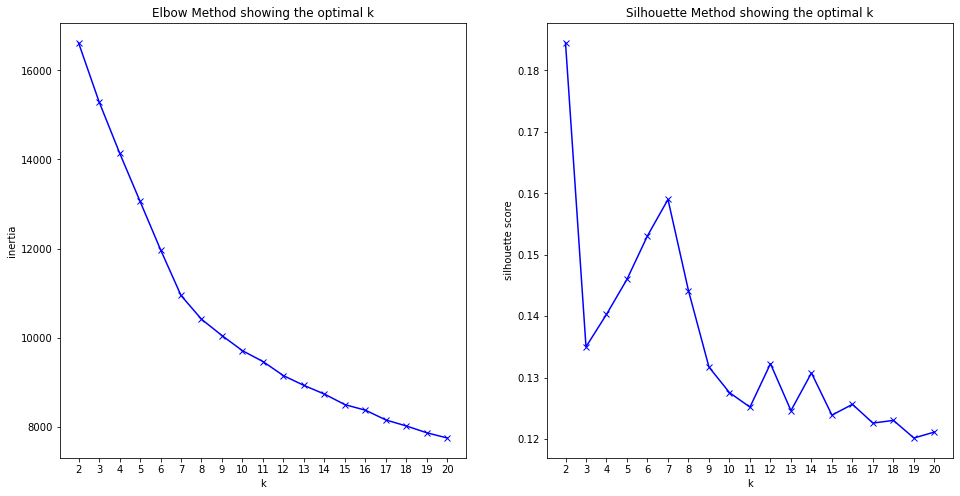

In [242]:
K = range(2, 21)
inertia = []
silhouette = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234,
                    verbose=1)
    kmeans.fit(X_scaled_df)
    filename = "kmeans_" + str(k) + ".pickle" # Path with filename
    with open(filename, "wb") as file:
        pickle.dump(kmeans,file)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X_scaled_df, kmeans.predict(X_scaled_df)))


import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,2,figsize=(16,8))
ax[0].plot(K, inertia, 'bx-')
ax[0].set_xlabel('k')
ax[0].set_ylabel('inertia')
ax[0].set_xticks(np.arange(min(K), max(K)+1, 1.0))
ax[0].set_title('Elbow Method showing the optimal k')
ax[1].plot(K, silhouette, 'bx-')
ax[1].set_xlabel('k')
ax[1].set_ylabel('silhouette score')
ax[1].set_xticks(np.arange(min(K), max(K)+1, 1.0))
ax[1].set_title('Silhouette Method showing the optimal k')

## Loading the scaler and the best model

In [243]:
def load(filename = "filename.pickle"): 
    try: 
        with open(filename, "rb") as file: 
            return pickle.load(file) 
    except FileNotFoundError: 
        print("File not found!") 

In [244]:
scaler2 = load("scaler.pickle")
scaler2

StandardScaler()

In [245]:
kmeans = KMeans(n_clusters=15, random_state=1234)
kmeans.fit(X_scaled_df)

KMeans(n_clusters=15, random_state=1234)

In [246]:
clusters = kmeans.predict(X_scaled_df)
#clusters
pd.Series(clusters).value_counts().sort_index()

0      54
1     156
2     191
3     142
4     111
5     149
6      56
7      10
8     112
9     194
10    116
11    188
12    160
13    139
14     31
dtype: int64

In [248]:
X["cluster"] = clusters
X.head()

/var/folders/_z/gw3f_k0d08zctss1m54yb4pc0000gn/T/ipykernel_50070/959056939.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,energy,speechiness,acousticness,instrumentalness,loudness,tempo,danceability,valence,liveness,time_signature,key,cluster
0,0.731,0.0557,0.3420,0.00101,-5.338,173.930,0.520,0.662,0.3110,4.0,6.0,12
1,0.563,0.1020,0.0254,0.00001,-6.135,106.998,0.905,0.324,0.1130,4.0,8.0,2
2,0.642,0.3400,0.3140,0.00000,-4.474,83.389,0.463,0.339,0.0686,4.0,1.0,0
3,0.728,0.0468,0.2980,0.00000,-4.595,114.996,0.714,0.901,0.1060,4.0,10.0,2
4,0.743,0.0656,0.0995,0.00000,-6.305,108.966,0.836,0.722,0.3350,4.0,10.0,2


In [157]:
data["Cluster_KNN"] = clusters

In [159]:
df=X
df

,energy,speechiness,acousticness,instrumentalness,loudness,tempo,danceability,valence,liveness,time_signature,key,cluster
0,0.731,0.0557,0.3420,0.001010,-5.338,173.930,0.520,0.662,0.3110,4.0,6.0,12
1,0.563,0.1020,0.0254,0.000010,-6.135,106.998,0.905,0.324,0.1130,4.0,8.0,2
2,0.642,0.3400,0.3140,0.000000,-4.474,83.389,0.463,0.339,0.0686,4.0,1.0,0
3,0.728,0.0468,0.2980,0.000000,-4.595,114.996,0.714,0.901,0.1060,4.0,10.0,2
4,0.743,0.0656,0.0995,0.000000,-6.305,108.966,0.836,0.722,0.3350,4.0,10.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1804,0.243,0.1230,0.8290,0.000001,-15.134,118.578,0.746,0.425,0.0905,4.0,4.0,3
1805,0.210,0.0670,0.8400,0.000002,-11.922,93.543,0.696,0.717,0.1070,4.0,4.0,3
1806,0.756,0.0499,0.7330,0.005050,-8.492,86.895,0.494,0.949,0.7600,4.0,0.0,4
1807,0.803,0.0743,0.7410,0.000061,-9.129,167.983,0.534,0.969,0.3070,4.0,10.0,2


In [121]:
pip install python-mnist

Note: you may need to restart the kernel to use updated packages.


In [123]:
from sklearn.manifold import TSNE
from mnist import MNIST
from sklearn.datasets import load_iris
from numpy import reshape
import seaborn as sns
import pandas as pd 

In [127]:
iris = load_iris()
x = iris.data
y = iris.target 

In [164]:
tsne = TSNE(n_components=11, verbose=1, random_state=123)
z = tsne.fit_transform(x)
z

/Users/mojgun/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/mojgun/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


ValueError: 'n_components' should be inferior to 4 for the barnes_hut algorithm as it relies on quad-tree or oct-tree.

In [161]:
X

,energy,speechiness,acousticness,instrumentalness,loudness,tempo,danceability,valence,liveness,time_signature,key,cluster
0,0.731,0.0557,0.3420,0.001010,-5.338,173.930,0.520,0.662,0.3110,4.0,6.0,12
1,0.563,0.1020,0.0254,0.000010,-6.135,106.998,0.905,0.324,0.1130,4.0,8.0,2
2,0.642,0.3400,0.3140,0.000000,-4.474,83.389,0.463,0.339,0.0686,4.0,1.0,0
3,0.728,0.0468,0.2980,0.000000,-4.595,114.996,0.714,0.901,0.1060,4.0,10.0,2
4,0.743,0.0656,0.0995,0.000000,-6.305,108.966,0.836,0.722,0.3350,4.0,10.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1804,0.243,0.1230,0.8290,0.000001,-15.134,118.578,0.746,0.425,0.0905,4.0,4.0,3
1805,0.210,0.0670,0.8400,0.000002,-11.922,93.543,0.696,0.717,0.1070,4.0,4.0,3
1806,0.756,0.0499,0.7330,0.005050,-8.492,86.895,0.494,0.949,0.7600,4.0,0.0,4
1807,0.803,0.0743,0.7410,0.000061,-9.129,167.983,0.534,0.969,0.3070,4.0,10.0,2


In [162]:
df = pd.DataFrame()
df["y"] = y
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]
df["comp-3"] = z[:,2]
df["comp-4"] = z[:,3]
df["comp-5"] = z[:,4]
df["comp-6"] = z[:,5]
df["comp-7"] = z[:,6]
df["comp-8"] = z[:,7]
df["comp-9"] = z[:,8]
df["comp-10"] = z[:,9]
df["comp-11"] = z[:,10]
sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 11),
                data=df).set(title="Iris data T-SNE projection") 

IndexError: index 2 is out of bounds for axis 1 with size 2

In [131]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df[feat_cols].values)
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.94933765 0.02279569 0.0150274 ]


/var/folders/_z/gw3f_k0d08zctss1m54yb4pc0000gn/T/ipykernel_50070/514884450.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['energy'] = pca_result[:,0]
/var/folders/_z/gw3f_k0d08zctss1m54yb4pc0000gn/T/ipykernel_50070/514884450.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['speechiness'] = pca_result[:,1]
/var/folders/_z/gw3f_k0d08zctss1m54yb4pc0000gn/T/ipykernel_50070/514884450.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

In [133]:

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="energy", y="cluster",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df.loc[X,:],
    legend="full",
    alpha=0.3
)

ValueError: Cannot index with multidimensional key

<Figure size 1152x720 with 0 Axes>

In [224]:
#plotX is a DataFrame containing 5000 values sampled randomly from X
plotX = X

#Rename plotX's columns since it was briefly converted to an np.array above
plotX.columns = X.columns
x.shape

(150, 4)

In [189]:
perplexity = 50

In [190]:
#T-SNE with one dimension
tsne_1d = TSNE(n_components=1, perplexity=perplexity)

#T-SNE with two dimensions
tsne_2d = TSNE(n_components=2, perplexity=perplexity)

#T-SNE with three dimensions
tsne_3d = TSNE(n_components=3, perplexity=perplexity)


In [191]:
#This DataFrame holds a single dimension,built by T-SNE
TCs_1d = pd.DataFrame(tsne_1d.fit_transform(plotX.drop(["cluster"], axis=1)))

#This DataFrame contains two dimensions, built by T-SNE
TCs_2d = pd.DataFrame(tsne_2d.fit_transform(plotX.drop(["cluster"], axis=1)))

#And this DataFrame contains three dimensions, built by T-SNE
TCs_3d = pd.DataFrame(tsne_3d.fit_transform(plotX.drop(["cluster"], axis=1)))

/Users/mojgun/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/Users/mojgun/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.

/Users/mojgun/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/Users/mojgun/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.

/Users/mojgun/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/Users/mojgun/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:805: Fut

In [197]:
TCs_1d.columns = ["TC1_1d"]

PCs_1d.columns = ["PC1_1d"]

#"TC1_2d" means: 'The first component of the components created for 2-D visualization, by T-SNE.'
#And "TC2_2d" means: 'The second component of the components created for 2-D visualization, by T-SNE.'
TCs_2d.columns = ["TC1_2d","TC2_2d"]

TCs_3d.columns = ["TC1_3d","TC2_3d","TC3_3d"]

In [198]:
plotX = pd.concat([plotX,TCs_1d,TCs_2d,TCs_3d], axis=1, join='inner')


In [199]:
plotX["dummy"] = 0


In [200]:
cluster0 = plotX[plotX["cluster"] == 0]
cluster1 = plotX[plotX["cluster"] == 1]
cluster2 = plotX[plotX["cluster"] == 2]

In [178]:
pip install plotly==5.8.1

     |████████████████████████████████| 15.2 MB 8.3 MB/s eta 0:00:01    |████████████████▋               | 7.8 MB 8.3 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


TypeError: unhashable type: 'dict'

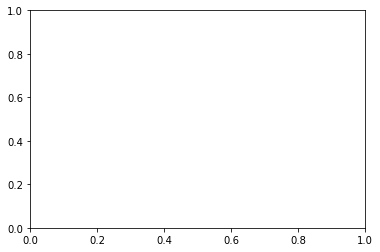

In [211]:
#Instructions for building the 1-D plot
import plotly.graph_objects as go
import matplotlib.pyplot as plt
%matplotlib inline
#trace1 is for 'Cluster 0'
trace1 = plt.scatter(
                    x = cluster0["TC1_1d"],
                    y = cluster0["dummy"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#trace2 is for 'Cluster 1'
trace2 = plt.scatter(
                    x = cluster1["TC1_1d"],
                    y = cluster1["dummy"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)

#trace3 is for 'Cluster 2'
trace3 = plt.scatter(
                    x = cluster2["TC1_1d"],
                    y = cluster2["dummy"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)

data1 = [trace1, trace2, trace3]

title = "Visualizing Clusters in One Dimension Using T-SNE (perplexity=" + str(perplexity) + ")"

#layout = dict(title = title,
 
    #xaxis= dict(title= 'TC1',ticklen= 5,zeroline= False),
        
        #yaxis= dict(title= '',ticklen= 5,zeroline= False)
         #    )

#fig = dict(data1=data1, layout = layout)

#iplot(fig)

In [ ]:
pca = PCA(n_components=11)
pca_result = pca.fit_transform(x)
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
Explained variation per principal component: [0.09746116 0.07155445 0.06149531

In [ ]:
X=data[["energy",  "speechiness", 
          "acousticness", "instrumentalness",
          "loudness","tempo","danceability",'valence',
          "liveness", "time_signature", "key"]]

In [221]:
X

,energy,speechiness,acousticness,instrumentalness,loudness,tempo,danceability,valence,liveness,time_signature,key,cluster
0,0.731,0.0557,0.3420,0.001010,-5.338,173.930,0.520,0.662,0.3110,4.0,6.0,12
1,0.563,0.1020,0.0254,0.000010,-6.135,106.998,0.905,0.324,0.1130,4.0,8.0,2
2,0.642,0.3400,0.3140,0.000000,-4.474,83.389,0.463,0.339,0.0686,4.0,1.0,0
3,0.728,0.0468,0.2980,0.000000,-4.595,114.996,0.714,0.901,0.1060,4.0,10.0,2
4,0.743,0.0656,0.0995,0.000000,-6.305,108.966,0.836,0.722,0.3350,4.0,10.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1804,0.243,0.1230,0.8290,0.000001,-15.134,118.578,0.746,0.425,0.0905,4.0,4.0,3
1805,0.210,0.0670,0.8400,0.000002,-11.922,93.543,0.696,0.717,0.1070,4.0,4.0,3
1806,0.756,0.0499,0.7330,0.005050,-8.492,86.895,0.494,0.949,0.7600,4.0,0.0,4
1807,0.803,0.0743,0.7410,0.000061,-9.129,167.983,0.534,0.969,0.3070,4.0,10.0,2


TypeError: list indices must be integers or slices, not str

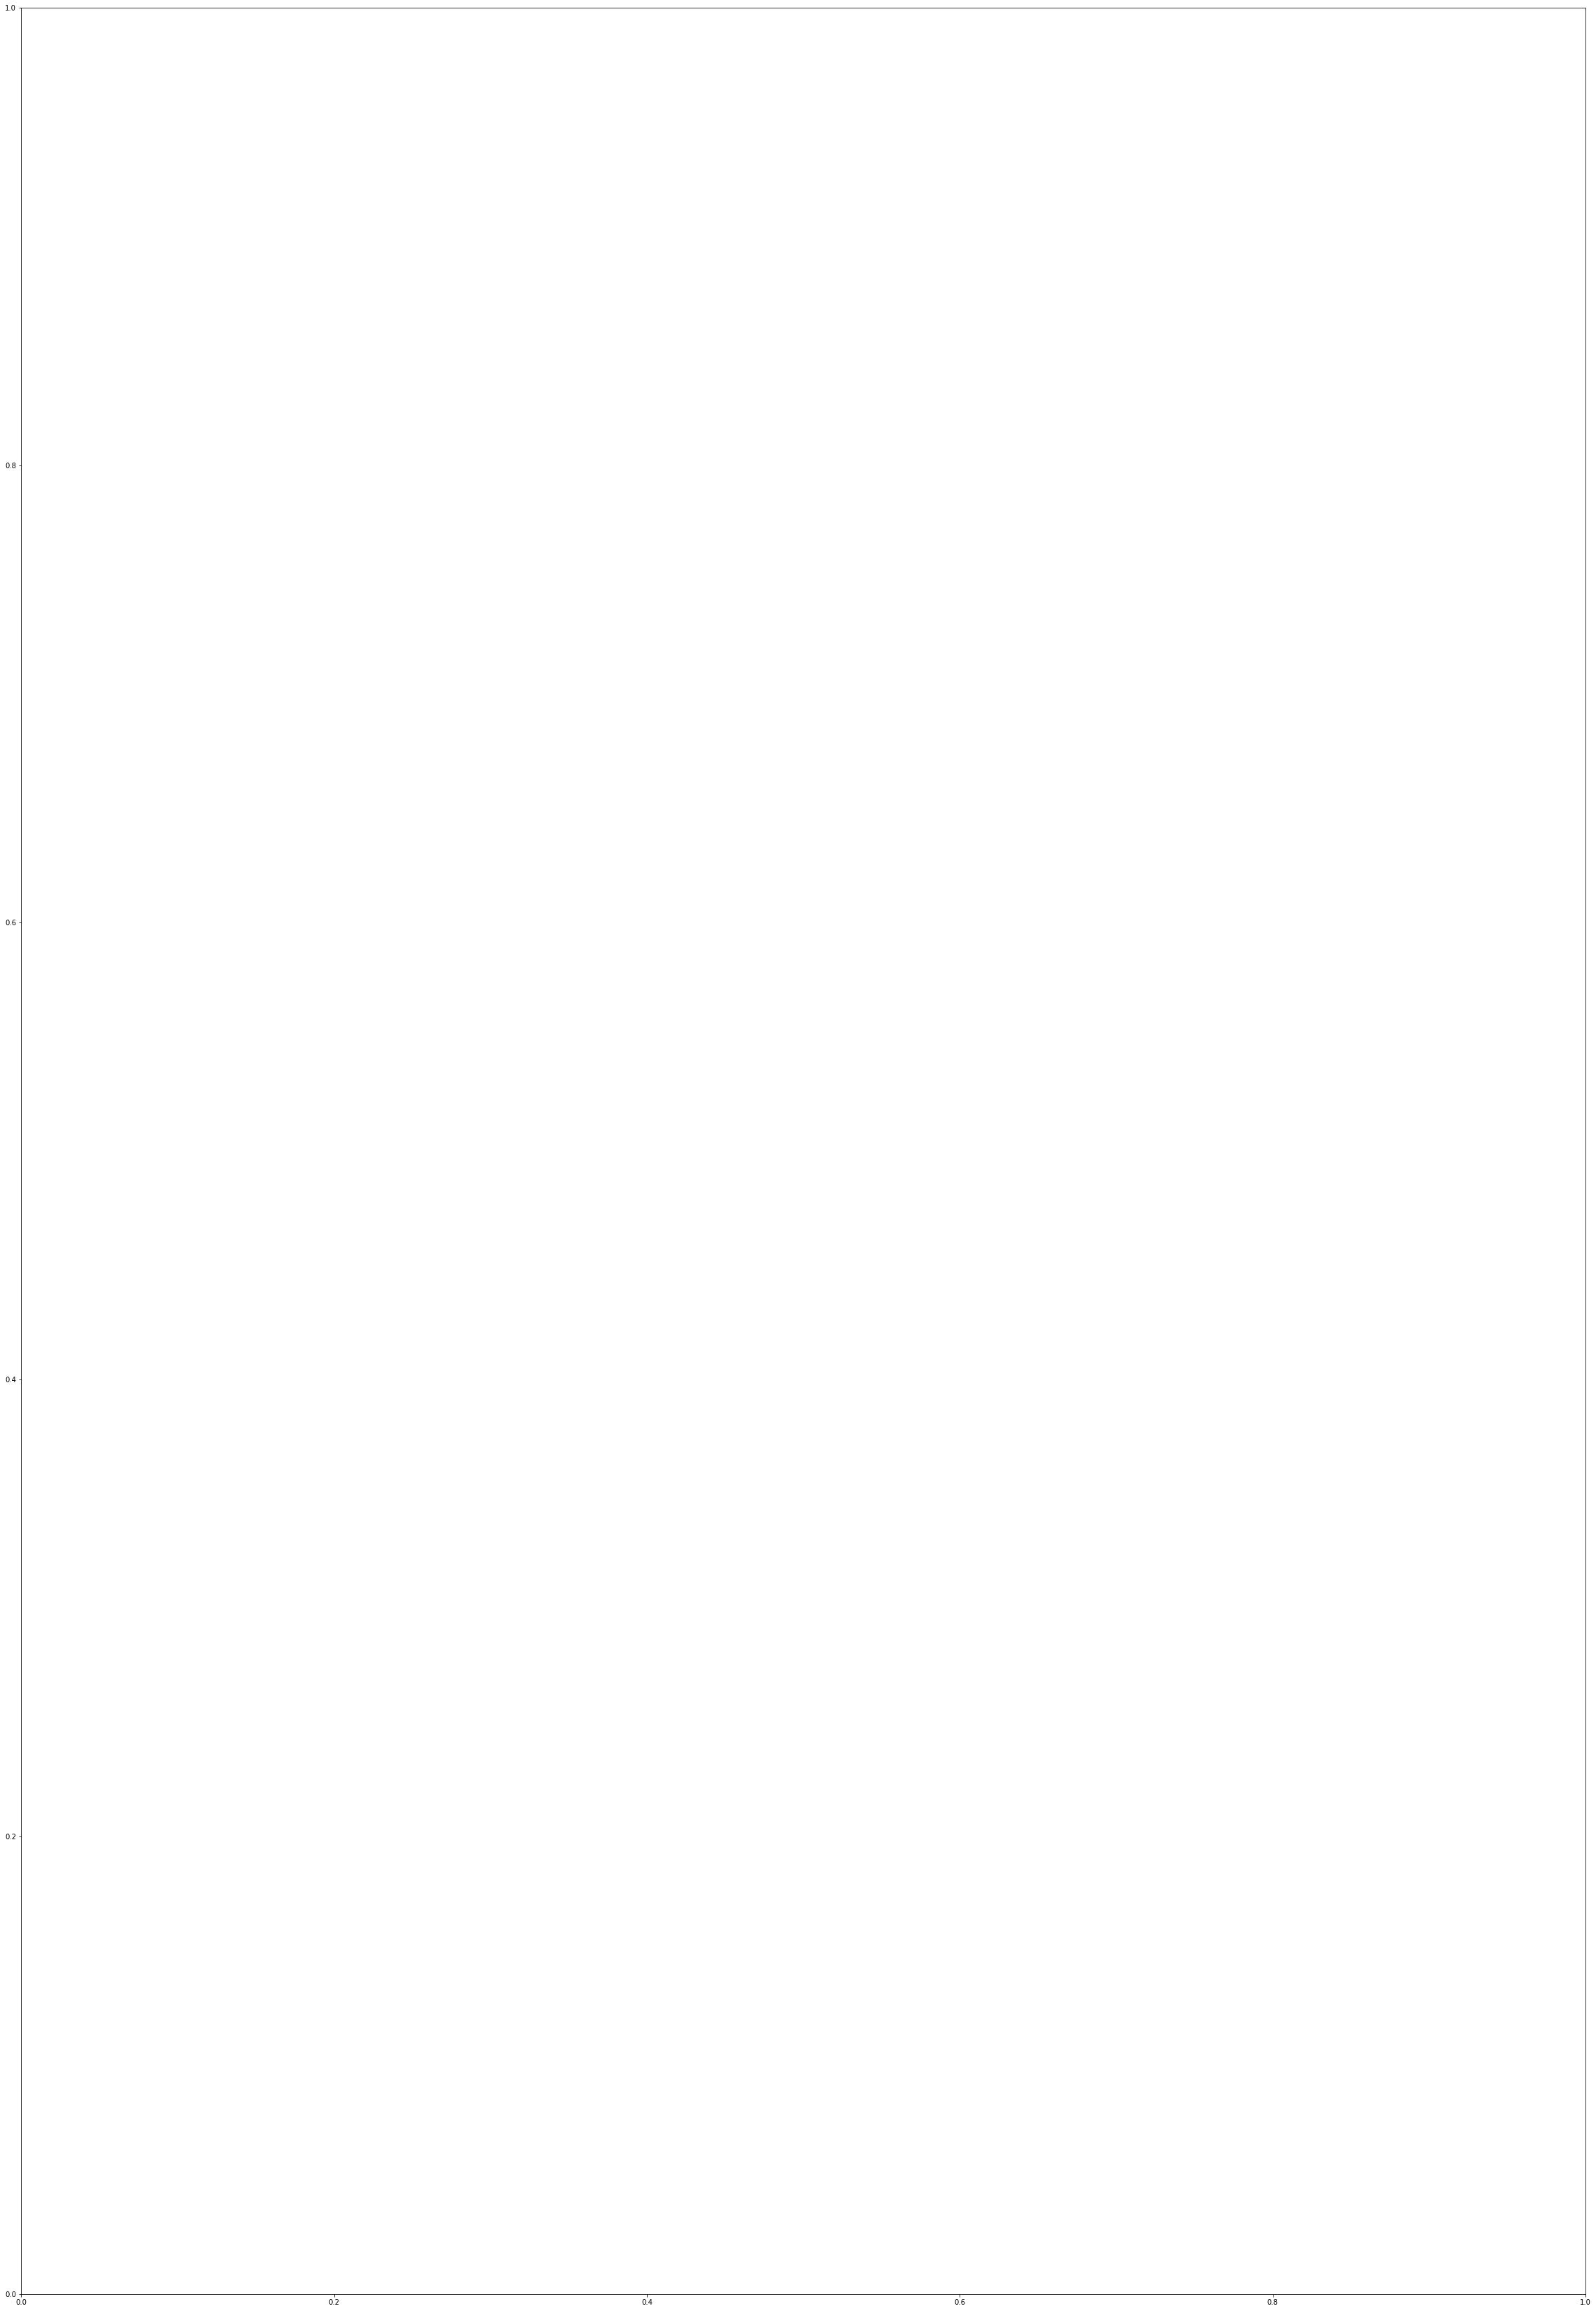

In [220]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
fig,ax=plt.subplots(1,1,figsize=(40,60))
plt.scatter(x=data['energy'],y=X['cluster']) # list
plt.show()
